## Luis Eduardo Jiménez del Muro - 02/10/2023

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

- Resultado primera integral con wolfram = 6.09207
- Resultado primera integral con wolfram = 0.869844

In [3]:
import numpy as np
import pandas as pd

def f1(x):
    return np.exp(x) * np.log10(x)

def f2(x):
    return np.sin(x) * np.log(x)

a = 1
b = 3
N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=[], index=N)


def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)


for i in N:
    aproximacion1 = montecarlo(f1, int(i), a, b)
    aproximacion2 = montecarlo(f2, int(i), a, b)
    table.loc[i, "Aproximación f1(x)"] =  aproximacion1
    table.loc[i, "Error f1(x)"] = abs(6.09207 - aproximacion1)
    table.loc[i, "Aproximación f2(x)"] =  aproximacion2
    table.loc[i, "Error f2(x)"] = abs(0.869844 - aproximacion2)

table

,Aproximación f1(x),Error f1(x),Aproximación f2(x),Error f2(x)
10.0,7.726623,1.634553,0.967939,0.098095
100.0,5.966200,0.125870,0.924550,0.054706
1000.0,6.274344,0.182274,0.881403,0.011559
10000.0,6.119722,0.027652,0.874141,0.004297
100000.0,6.089499,0.002571,0.868437,0.001407


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

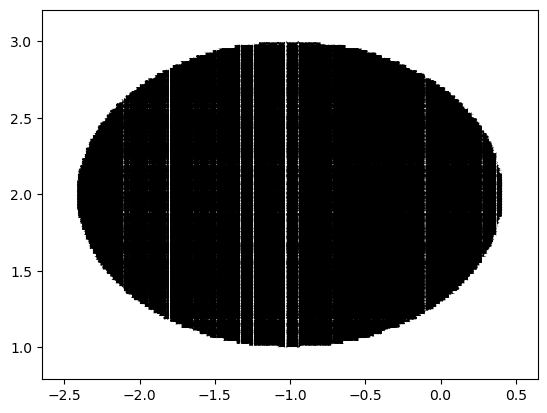

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def bernoulli (x, y):
    return x**2 + 2*y**2 <= - 2*x + 8*y - 7

x = np.random.uniform(-2.5, 0.5, 700)
y = np.random.uniform(0.9, 3.1, 700)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, s=1, c=bernoulli(X,Y), cmap="Greys") #cmap: cambia de color el area deseada


In [43]:
def montecarlo(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B) * AR


N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación", "Error Relativo"], index=N)

for i in N:
    AR = (0.5 + 2.5) * (3.1 - 0.9)
    AD = montecarlo(bernoulli, -2.5, 0.5, 0.9, 3.1, int(i))
    C_rel = ((1 - (AD / AR))/(AD / AR))**(1/2)
    error = np.log10(C_rel) - ((1/2)*np.log10(i))
    
    table.loc[i, "Aproximación"] =  AD
    table.loc[i, "Error Relativo"] = error

table

,Aproximación,Error Relativo
10.0,1.32,-0.19897
100.0,3.828,-1.070089
1000.0,4.5012,-1.665679
10000.0,4.38702,-2.148596
100000.0,4.448334,-2.657711


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### Carrera: Ingniería Financiera
1. **VaR (Valor en riesgo):**  El VaR es una medida estadística que establece cuanto es el dinero máximo que se puede perder en una inversion dentro de un horizonte de tiempo. Es útil para generar grandes cantidades de posibles resultados que podría tener una inversión con base a datos iniciales reales ingresados previamente.

2. **Gestión de riesgos:** Por medio de la simulación de montecarlo se pueden evaluar los riesgos que tiene efectuar ciertos proyectos en las empresas, por lo que, saber que tan probable es que pase algo es útil para las empresas para que preparen soluciones a ellos antes de que pasen.

3. **Valuación de opciones en el mercado de derivados:** Es una de las aplicaciones mas comunes de la integración de Montecarlo en mi carrera. Es útil debido a que se trabajan con múltiples escenarios aleatorios, ya que, de que existen opciones llamadas "americanas" las cuales se pueden ejercer en cualquier momento, por lo que se plantean modelos matemáticos que solo pueden ser resueltos por métodos numéricos, como la integración de Montecarlo.

**REFERENCIAS**

- MIT (s. f.). Monte Carlo Integration...in a Nutshel. https://ocw.mit.edu/courses/2-086-numerical-computation-for-mechanical-engineers-fall-2014/resources/mit2_086f14_monte_carlo/

- Sevilla, A. (s. f.). VaR por Montecarlo. Economipedia. https://economipedia.com/definiciones/var-monte-carlo.html

- Martín, Juan. (2007). ▷ ¿Que es el método Monte Carlo? - Gestión de los riesgos. https://www.cerem.es/blog/cuanto-vale-el-riesgo-el-metodo-monte-carlo

- Figueroa, A. (2009). Valuación de opciones americanas por el método Montecarlo. biblat. https://biblat.unam.mx/es/revista/revista-mexicana-de-economia-agricola-y-de-los-recursos-naturales/articulo/valuacion-de-opciones-americanas-por-el-metodo-montecarlo